In [8]:
%matplotlib inline
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]


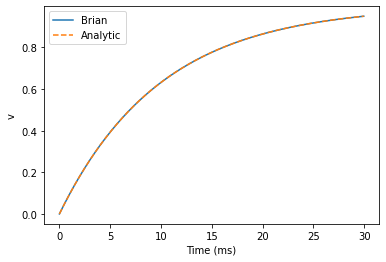

In [9]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1 (unless refractory)
'''

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=0)

run(30*ms)

#resulting neuron firing 
plot(M.t/ms, M.v[0], 'C0', label='Brian')
#expected neuron firing from solving the linear ode 
plot(M.t/ms, 1-exp(-M.t/tau), 'C1--',label='Analytic')
xlabel('Time (ms)')
ylabel('v')
legend()

Text(0, 0.5, 'v')

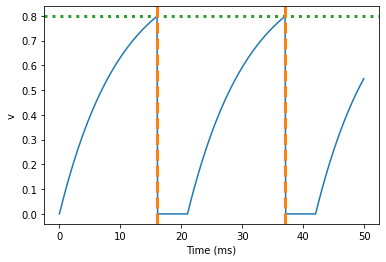

In [3]:
# leaky integrate and fire spikes 

## Neuron without refractory 
#G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

#Neuron with refractory 
G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', refractory=5*ms, method='exact')


M = StateMonitor(G, 'v', record=0)
spikeMon = SpikeMonitor(G)

run(50*ms)
plot(M.t/ms, M.v[0])
axhline(0.8, ls=':', c='C2', lw=3)
for t in spikeMon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v')

Text(0, 0.5, 'v')

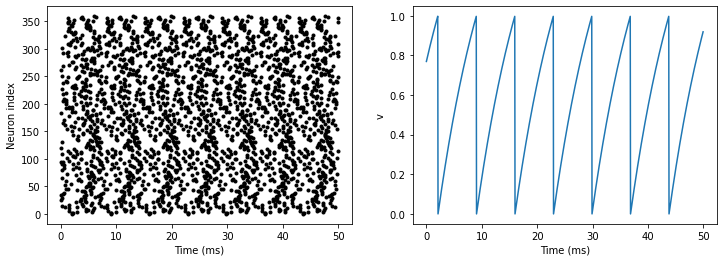

In [7]:
start_scope()

N = 360
tau = 10*ms
eqs = '''
dv/dt = (2-v)/tau : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')
G.v = 'rand()'

stateMon = StateMonitor(G, 'v', record=1)
spikemon = SpikeMonitor(G)

run(50*ms)

figure(figsize=(12,4))
subplot(121)
plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')

subplot(122)
plot(stateMon.t/ms, stateMon.v[0])
xlabel('Time (ms)')
ylabel('v')

WARNING    't' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 37. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


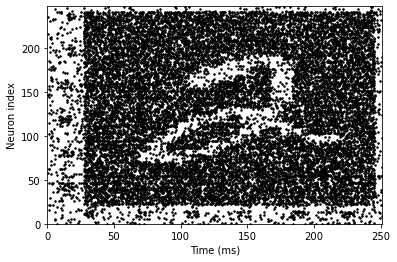

In [5]:
start_scope()
from matplotlib.image import imread

img = (1-imread("/Users/theresejoseph/Documents/Neural_Network_Playground/data/mnist_2.png"))[::-1, :, 0].T

num_samples, N = img.shape
ta = TimedArray(img, dt=1*ms) # 228
A = 1.5
tau = 2*ms
eqs = '''
dv/dt = (A*ta(t, i)-v)/tau+0.8*xi*tau**-0.5 : 1
'''
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='euler')
M = SpikeMonitor(G)
run(num_samples*ms)
plot(M.t/ms, M.i, '.k', ms=3)
xlim(0, num_samples)
ylim(0, N)
xlabel('Time (ms)')
ylabel('Neuron index');

INFO       width adjusted from 1. ms to 1.05 ms [brian2.monitors.ratemonitor.adjusted_width]


(<Figure size 720x288 with 3 Axes>,
 <AxesSubplot:title={'center':'Raster Plot'}, ylabel='neuron #'>,
 <AxesSubplot:title={'center':'Population Activity'}, ylabel='A(t) [Hz]'>,
 <AxesSubplot:title={'center':'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

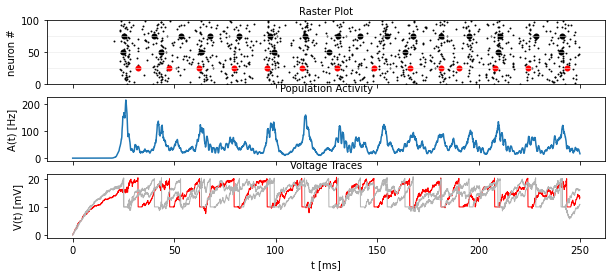

In [6]:
from neurodynex3.brunel_model import LIF_spiking_network
from neurodynex3.tools import plot_tools
import brian2 as b2

rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(sim_time=250. * b2.ms)
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms)
